# SUICIDE RATES OVERVIEW FROM 1985 TO 2016

## PREAMBLE
This notebook consists of data from 'Suicide rates overview 1985 to 2016' dataset. The aim of this project is to analyze the suicide rates of different countries based on various parameters such as age, gender, gdp, etc, and thereby predict its trend if these factors continue to prevail. We try to visualize the data through different types of graphs and further predict the trend of this global problem, in the following years. We've also visualized the suicide trends of Canada in this project.

## DATA UNDERSTANDING
When talking about the trending suicide rates in the world one would usually thinks about the growth of human population and the improvement of their life conditions. Other than these factors there are many other implicit factors that may force a person to take such a drastic step.
The dataset consistes of several such parameters that may be used to determine this global trend-
1. Countries- There's a column that consists of all the major countries that are prone to suicides. There are 27820 countries present in the dataset, arranged alphabetically.
2. Year- All these coutries have been further categorised into years, ranging from 1985 to 2016. Each year further gives the suicide-count based on the other paramteres(will be discussed shortly).
3. Age- Age plays a prominent role in determining the suicide rates. The dataset consits of age of people who commit suicide, ranging from 15 to 70+ years.
4. Suicide numbers- This parameters depicts the frequency of suicide of a particular country, in a particular year, on the basis of gender and age of the people who have committed suicide.

Other supporting parameters that can be used to give the subtle details of this trend are-
1. Population- As the population of a country increases, the employment and opportunities that should be available to an individual decreases, thereby affecting the mental health.
2. GDP- A country with higer Gross Domestic Product would serve its citizens better as compared to a country with an average or low gdp. This would further affect the competition for survival of an individual and may contribute negatively to his/her metal health.
3. HDI- The Human Development Index can safely predict the socio-economic pressures on an individual.

#### Importing libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Fetching Dataset

In [127]:
df=pd.read_csv('DS_project.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [142]:
df.size

278200

In [143]:
df.shape

(27820, 10)

In [144]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [146]:
df.groupby('country').describe()

year                                                  \
                      count         mean       std     min      25%     50%   
country                                                                       
Albania               264.0  1999.227273  6.788036  1987.0  1994.00  1999.5   
Antigua and Barbuda   324.0  1999.481481  9.095450  1985.0  1991.00  2000.0   
Argentina             372.0  2000.000000  8.956318  1985.0  1992.00  2000.0   
Armenia               298.0  2002.791946  8.049740  1990.0  1996.00  2002.0   
Aruba                 168.0  2004.285714  4.444121  1995.0  2001.00  2004.5   
...                     ...          ...       ...     ...      ...     ...   
United Arab Emirates   72.0  2007.500000  1.719810  2005.0  2006.00  2007.5   
United Kingdom        372.0  2000.000000  8.956318  1985.0  1992.00  2000.0   
United States         372.0  2000.000000  8.956318  1985.0  1992.00  2000.0   
Uruguay               336.0  2000.214286  8.902888  1985.0  1993.75  2000.5   
Uzbekistan            264.0  2001.318182  7.438793  1990.0  1995.00  2000.5   

                                      suicides_no               ...  \
                          75%     max       count         mean  ...   
country                                                         ...   
Albania               2005.00  2010.0       264.0     7.462121  ...   
Antigua and Barbuda   2007.00  2015.0       324.0     0.033951  ...   
Argentina             2008.00  2015.0       372.0   221.018817  ...   
Armenia               2010.00  2016.0       298.0     6.392617  ...   
Aruba                 2008.00  2011.0       168.0     0.601190  ...   
...                       ...     ...         ...          ...  ...   
United Arab Emirates  2009.00  2010.0        72.0     8.638889  ...   
United Kingdom        2008.00  2015.0       372.0   367.755376  ...   
United States         2008.00  2015.0       372.0  2779.604839  ...   
Uruguay               2007.25  2015.0       336.0    39.101190  ...   
Uzbekistan            2009.00  2014.0       264.0   131.829545  ...   

                     suicides/100k pop         gdp_per_capita ($)  \
                                   75%     max              count   
country                                                             
Albania                         5.1000   18.88              264.0   
Antigua and Barbuda             0.0000   30.00              324.0   
Argentina                      14.1325   63.01              372.0   
Armenia                         4.9525   24.82              298.0   
Aruba                          12.3575  224.97              168.0   
...                                ...     ...                ...   
United Arab Emirates            2.0375    9.46               72.0   
United Kingdom                 12.4075   23.99              372.0   
United States                  23.3050   58.95              372.0   
Uruguay                        26.5975  115.05              336.0   
Uzbekistan                     12.2425   26.61              264.0   

                                                                             \
                              mean           std      min      25%      50%   
country                                                                       
Albania                1859.045455   1387.229780    251.0    796.0   1213.0   
Antigua and Barbuda   10448.185185   3335.016995   3850.0   7976.0  10468.0   
Argentina              7914.096774   3506.725386   2670.0   4683.0   7918.0   
Armenia                1873.919463   1541.130961    357.0    515.0    788.0   
Aruba                 24221.642857   2968.073993  17949.0  22317.0  24501.5   
...                            ...           ...      ...      ...      ...   
United Arab Emirates  42162.000000   4811.254798  34960.0  36964.0  43653.0   
United Kingdom        31908.354839  12736.016607   9231.0  20927.0  29508.0   
United States         39269.612903  12334.117581  19693.0  27760.0  39218.0   
Urugua

## DATA CLEANING

In [91]:
df.shape
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

####  Since HDI has highest null values, we can safely drop this column

In [128]:
df=df.drop(['HDI for year'],axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,15,66,24,900",796,Boomers


#### The column country-year doesn't give any relevant information either, we can safely drop it as well

In [129]:
df=df.drop(['country-year'],axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,15,66,24,900",796,Boomers


In [94]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

#### We can classify the different age groups

In [130]:
age_groups = ['child', 'teenagers', 'young adult', 'mid adult', 'old', 'very old']
age_ranges = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in range(6): 
    df["age"]=df["age"].apply(lambda x: str(x).replace(age_ranges[i],age_groups[i]))
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,teenagers,21,312900,6.71,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,mid adult,16,308000,5.19,"2,15,66,24,900",796,Silent
2,Albania,1987,female,teenagers,14,289700,4.83,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,very old,1,21800,4.59,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,young adult,9,274300,3.28,"2,15,66,24,900",796,Boomers


## DATA VISUALIZATION

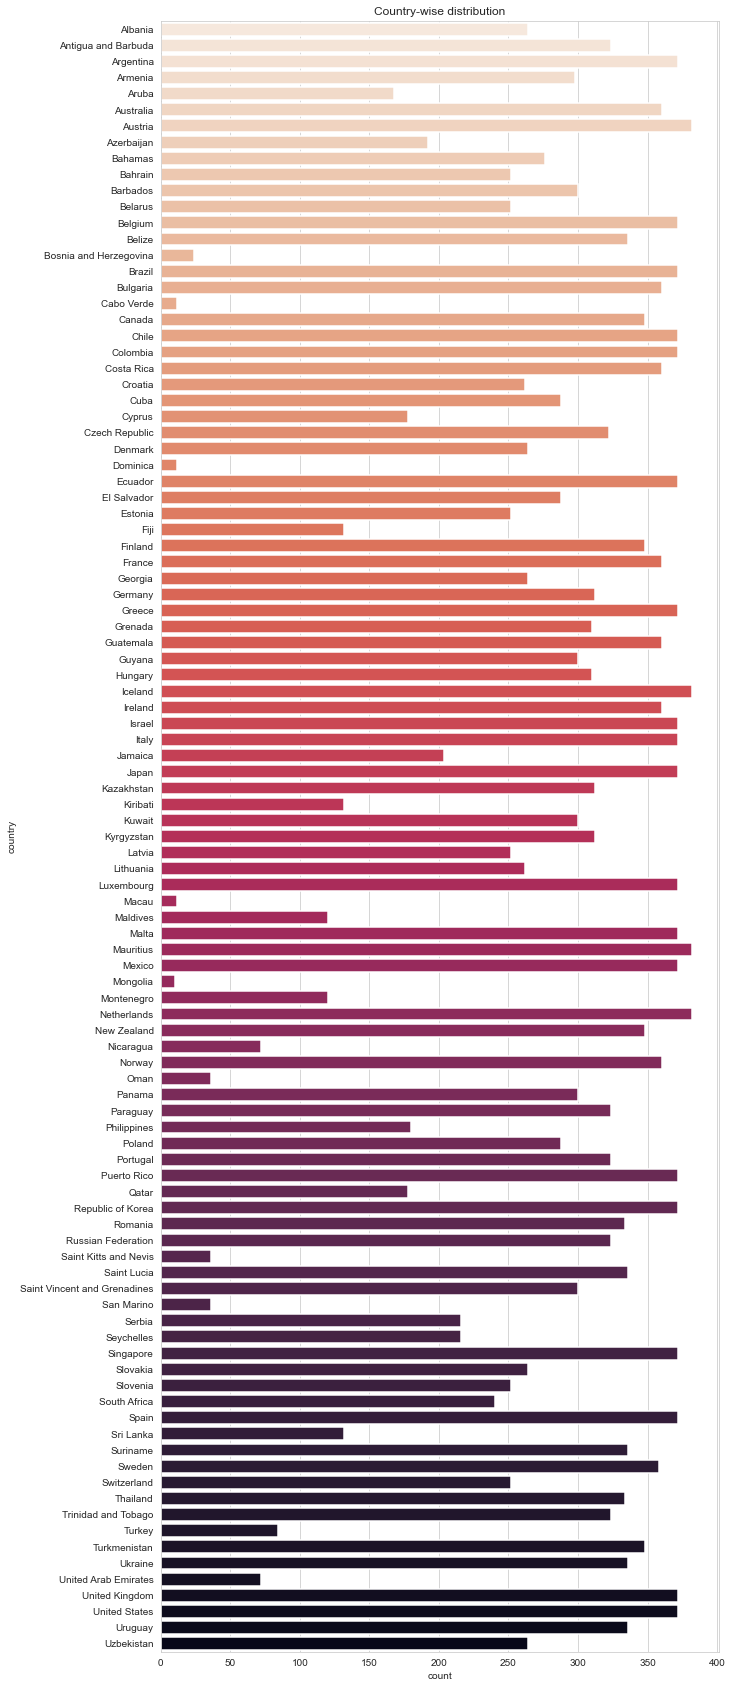

In [141]:
#Visualising Country-wise distribution
sns.set_style("whitegrid")
alpha = 1
plt.figure(figsize=(10,30))
sns.countplot(y='country', data=df, alpha=alpha, linewidth=1.5, palette="rocket_r")
plt.title('Country-wise distribution')
plt.show()

In [97]:
df["sex"].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

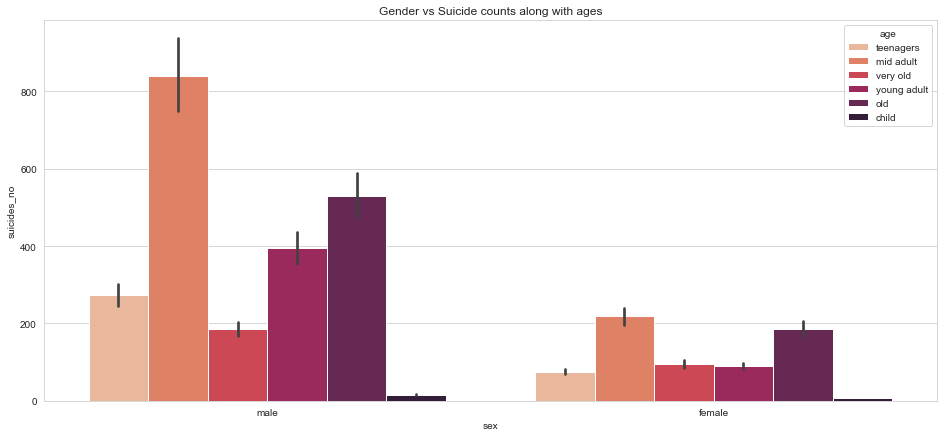

In [99]:
plt.figure(figsize=(16,7))
graph1 = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',palette="rocket_r",data = df)
plt.title('Gender vs Suicide counts along with ages')
plt.show()

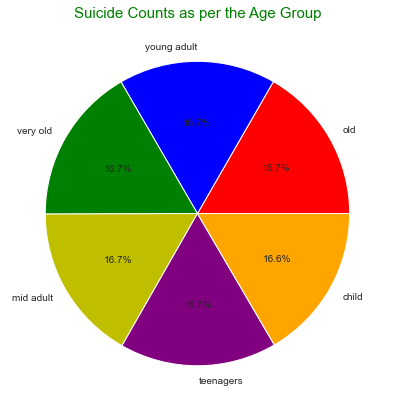

In [100]:
df.age.dropna(inplace = True)
labels = df.age.value_counts().index
colors = ['r','b','g','y','purple','orange']
explode = [0,0,0,0,0,0]
sizes = df.age.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide Counts as per the Age Group',color = 'Green',fontsize = 15)
plt.show()

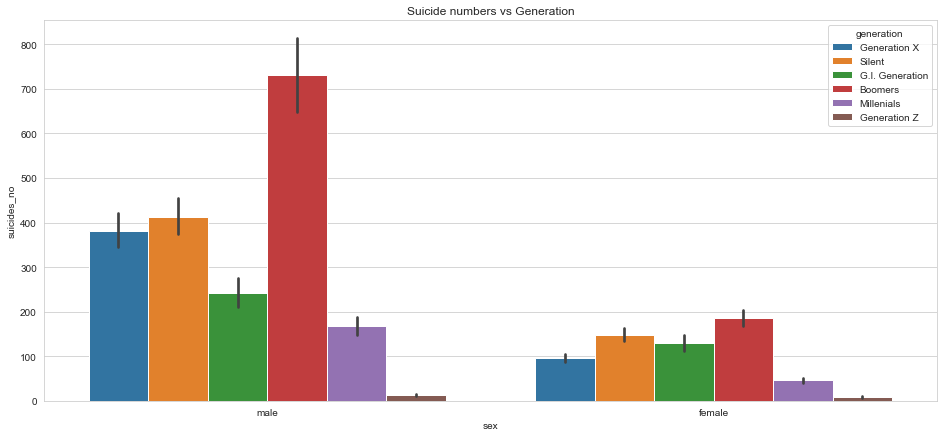

In [101]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = df)
plt.title('Suicide numbers vs Generation')
plt.show()

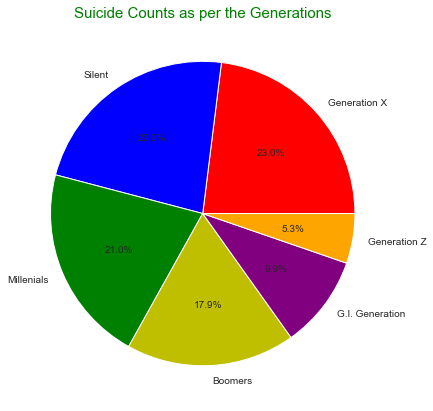

In [102]:
df.generation.dropna(inplace = True)
labels = df.generation.value_counts().index
colors = ['r','b','g','y','purple','orange']
explode = [0,0,0,0,0,0]
sizes = df.generation.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide Counts as per the Generations',color = 'Green',fontsize = 15)
plt.show()

#### Top countries with highest suicide counts as per age.

In [103]:
#top countries with highest suicide counts as per the age
df_age = df.sort_values(by=["suicides_no","age"], ascending=False)
df_age.reset_index(inplace=True,drop=True)
df_age.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Russian Federation,1994,male,mid adult,22338,19044200,117.30,"3,95,07,73,01,248",2853,Boomers
1,Russian Federation,1995,male,mid adult,21706,19249600,112.76,"3,95,53,10,66,563",2844,Boomers
2,Russian Federation,2001,male,mid adult,21262,21476420,99.00,"3,06,60,26,73,980",2229,Boomers
3,Russian Federation,2000,male,mid adult,21063,21378098,98.53,"2,59,70,84,96,267",1879,Boomers
4,Russian Federation,1999,male,mid adult,20705,21016400,98.52,"1,95,90,57,67,669",1412,Boomers


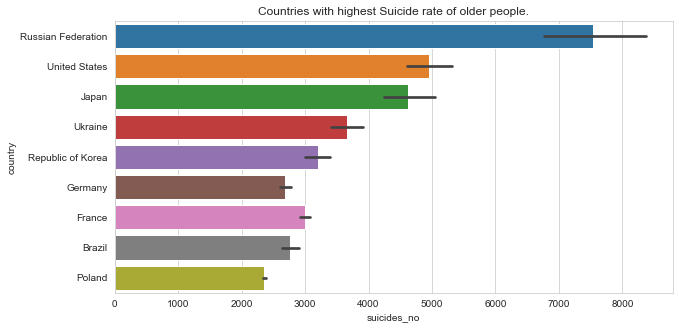

In [104]:
plt.figure(figsize=(10,5))
sns.barplot(df_age.suicides_no[:600],df_age.country[:600])
plt.title("Countries with highest Suicide rate of older people.")
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

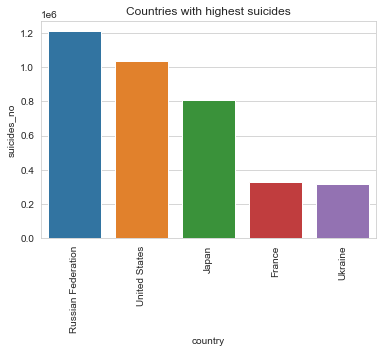

In [105]:
country_suicide = df[['country','suicides_no']].groupby(['country']).sum()
country_suicide = country_suicide.reset_index().sort_values(by='suicides_no', ascending=False)
top = country_suicide[:5]
sns.barplot(x='country', y='suicides_no', data=top).set_title('Countries with highest suicides')
plt.xticks(rotation=90)

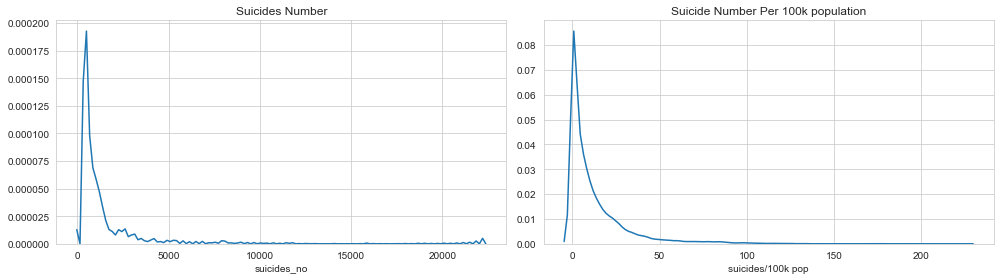

In [106]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Suicides Number')
sns.distplot(df['suicides_no'], hist=False)
plt.subplot(122)
plt.title('Suicide Number Per 100k population')
sns.distplot(df['suicides/100k pop'], hist=False)
plt.tight_layout()

## DATA ANALYSIS FOR SUICIDE COUNT IN CANADA

In [107]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [108]:
df_canada = df[df['country'] == 'Canada']

In [109]:
df_canada = df_canada.reset_index(drop= True) ##setting index from 0 onwards.

In [110]:
df_canada.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Canada,1985,male,very old,111,390200,28.45,"3,64,75,64,99,451",15522,G.I. Generation
1,Canada,1985,male,old,502,1841000,27.27,"3,64,75,64,99,451",15522,G.I. Generation
2,Canada,1985,male,young adult,605,2240500,27.00,"3,64,75,64,99,451",15522,Boomers
3,Canada,1985,male,mid adult,774,3046800,25.40,"3,64,75,64,99,451",15522,Silent
4,Canada,1985,male,teenagers,560,2224600,25.17,"3,64,75,64,99,451",15522,Generation X


In [111]:
df_canada[(df_canada['year'] == 1985) & (df_canada['age'] == 'very old')]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Canada,1985,male,very old,111,390200,28.45,"3,64,75,64,99,451",15522,G.I. Generation
8,Canada,1985,female,very old,34,642900,5.29,"3,64,75,64,99,451",15522,G.I. Generation


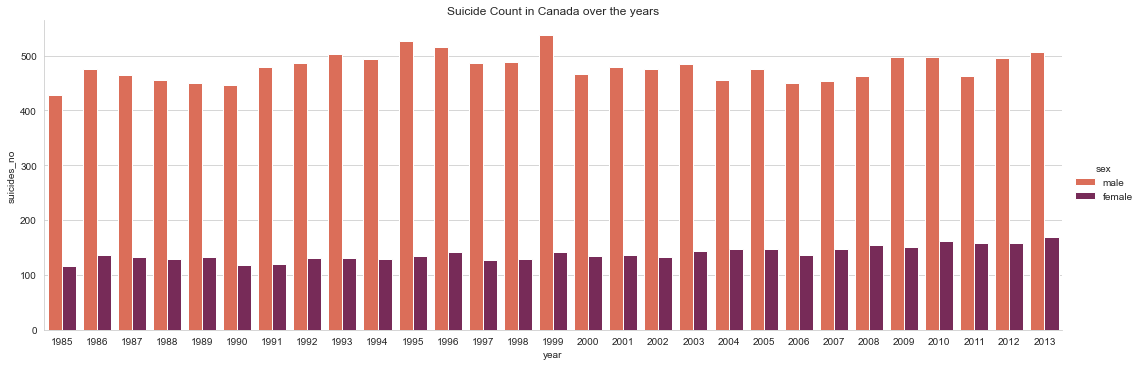

In [112]:
sns.catplot(
    data=df_canada, kind="bar",
    x="year", y="suicides_no", hue="sex",
    ci= None, palette="rocket_r",height=5, aspect= 3
)
plt.title('Suicide Count in Canada over the years')
plt.show()

Text(0.5, 1.0, 'Male vs Female Suicide Counts as per aggregate mean count')

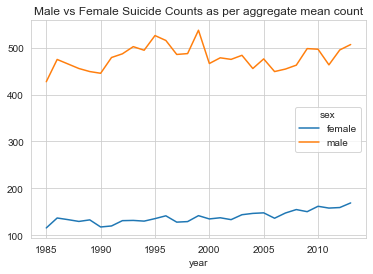

In [113]:
df_group = df_canada.groupby(['year','sex'])['suicides_no'].mean().unstack().plot() 
plt.title("Male vs Female Suicide Counts as per aggregate mean count")

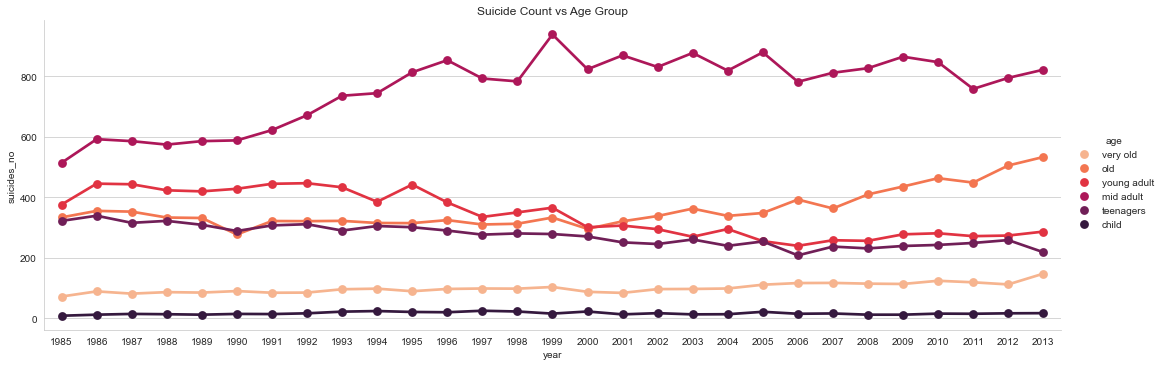

In [114]:
sns.catplot(
    data=df_canada, kind="point",
    x="year", y="suicides_no", hue="age",
    ci= None, palette="rocket_r",height=5, aspect= 3
)
plt.title('Suicide Count vs Age Group')
plt.show()

## DATA MODELING
The data is modeled using linear regression model of supervised learning. Since suicide rates are continuous in nature, we've tried to predict the number of suicides, given the population. The metrics considered to evaluate the model performance are Accuracy and Root Mean Squared Error. 

### PREDICTION OF NUMBER OF SUICIDES, GIVEN THE POPULATION

In [115]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [116]:
df.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,1.000000


<Figure size 1440x360 with 0 Axes>

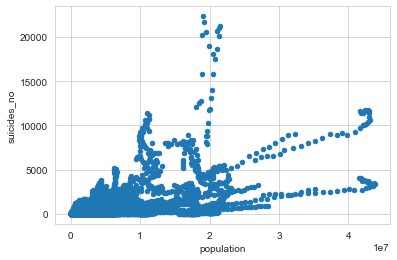

In [117]:
##as we see the correlation of suicides_no and population is 0.61612, it is significant, we predict the results on the basis of population
plt.figure(figsize=(20,5))
df.plot.scatter('population','suicides_no')
## dependent variable- suicide_no
## independent variable- population

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [119]:
linear_reg=LinearRegression()

x=df.population.values.reshape(-1,1)
y=df.suicides_no.values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.1)
linear_reg.fit(x_train,y_train)

intercept =linear_reg.intercept_
coefficient=linear_reg.coef_
print("intercept:",intercept)
print("coefficient:",coefficient)
print("Prediction 5 million:",linear_reg.predict([[5000000]]))
print("Prediction 10 million:",linear_reg.predict([[10000000]]))
print("Prediction 20 million:",linear_reg.predict([[20000000]]))

intercept: [-46.21542267]
coefficient: [[0.00016525]]
Prediction 5 million: [[780.029634]]
Prediction 10 million: [[1606.27469067]]
Prediction 20 million: [[3258.76480401]]


In [120]:
df.population.min()


278

In [121]:
df.population.max()

43805214

In [122]:
#we try to predict the values taking minimum and maximum population into consideration

In [123]:
value_test=np.array([278,5000000,10000000,15000000,20000000,45000000,70000000]).reshape(-1,1)
y_pred=linear_reg.predict(value_test)
print("y_pred:",y_pred)

y_pred: [[  -46.16948345]
 [  780.029634  ]
 [ 1606.27469067]
 [ 2432.51974734]
 [ 3258.76480401]
 [ 7389.99008737]
 [11521.21537073]]


#### Plotting the prediction graph

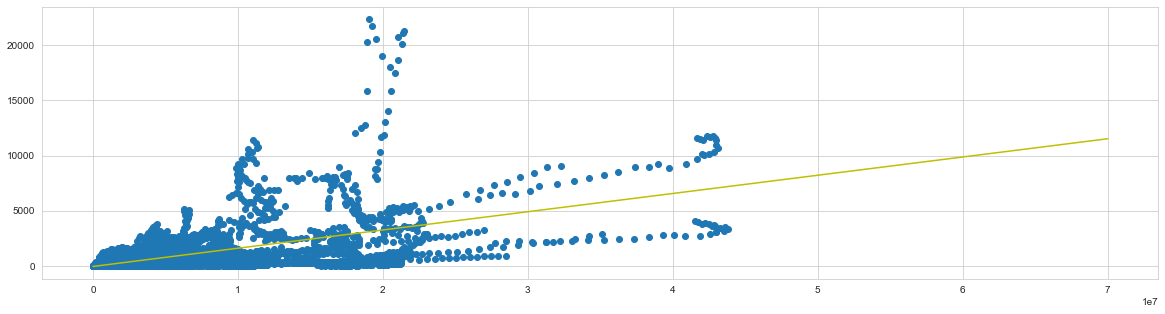

In [124]:
plt.figure(figsize=(20,5))
plt.scatter(x,y)
plt.plot(value_test,y_pred,color='y')
plt.show()

## PERFORMANCE EVALUATION

#### Checking for mean-squared-error

In [139]:
y_pred_train=linear_reg.predict(x_train) #prediction on training data
error2=np.sqrt(mean_squared_error(y_train,y_pred_train))
print("Training data error is",error2)
y_pred_test=linear_reg.predict(x_test) #prediction on test data
error =np.sqrt(mean_squared_error(y_test,y_pred_test)) #calculate error
print("Testing data error is",error)

Training data error is 758.0387318514599
Testing data error is 711.6142815927127


#### Calculating Accuracy

In [140]:
acc_train_pred = linear_reg.score(x_train, y_train)
acc_test_pred = linear_reg.score(x_test, y_test)
print("Accuracy on training Data: {:.3f}".format(acc_train_pred))
print("Accuracy on test Data: {:.3f}".format(acc_test_pred))

Accuracy on training Data: 0.452
Accuracy on test Data: 0.357


## ANALYSIS OF OUTCOMES
1. Males commit more suicides as compared to females, globally.
2. People categorized as mid-adults i.e. age 35-54, are more prone to suicides worldwide.
3. People of the generation 'Silent' are more prone to suicides.
4. Russian Federation, the United States and Japan, have the highest suicide rates.
5. Suicide rate increases as the population increases.

## USE OF PROJECT

1. The analysis given by the model and visualizations help us to gain an insight of the factors involved in committing suicide. This will indeed help in suicide prevention.
2. The countries that are most affected by this trend have been visualized and should be given utmost consideration to diminish their rates.
3. As per the dataset, the age group that is most affected by mental pressure has been identified and efficient measures could be taken to educate them to handle stress, anxiety, depression, etc.